24
24


(0.0, 1.1)

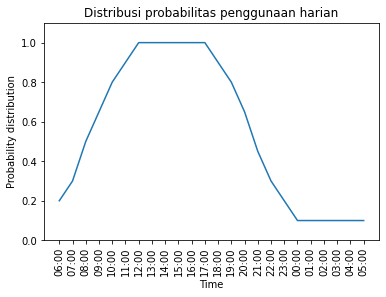

In [1]:
from model_lomba import *
import matplotlib.pyplot as plt
import seaborn as sns

demand = [0.2,0.3,0.5,0.65,0.8,0.9,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.8,0.65,0.45,0.3,0.2,0.1,0.1,0.1,0.1,0.1,0.1]
hour = ["06:00","07:00","08:00","09:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00","00:00","01:00","02:00","03:00","04:00","05:00"]
print(len(demand))
print(len(hour))

plt.plot(hour,demand)
plt.xticks(rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('Probability distribution')
plt.title('Distribusi probabilitas penggunaan harian')
plt.ylim([0.0,1.1])

In [2]:


map_width = 50
map_height = 50
moore = False
model = switching_model(num_of_motorist=50,num_of_stations=30,inv_size=10,cp_size= 10,width=map_width,height=map_height,moore=moore, configuration="less", demand = demand)

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

5


In [3]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Position  Charge Alive  Full_battery  Empty_battery  CP_full  \
Step AgentID                                                                
0    0           None  2600.0  None           NaN            NaN      NaN   
     1           None  2600.0  None           NaN            NaN      NaN   
     2           None  2600.0  None           NaN            NaN      NaN   
     3           None  2600.0  None           NaN            NaN      NaN   
     4           None  2600.0  None           NaN            NaN      NaN   

              CP_empty  
Step AgentID            
0    0             NaN  
     1             NaN  
     2             NaN  
     3             NaN  
     4             NaN

In [4]:
motorist_alive = agent_data.xs(num_of_step-1,level = "Step")["Alive"]
motorist_id = []
for motor in model.motorists:
    motorist_id.append(motor.unique_id)
motorist_alive[motorist_id]

AgentID
150     True
151     True
152    False
153    False
154     True
155    False
156    False
157     True
158     True
159     True
160    False
161     True
162     True
163    False
164    False
165    False
166     True
167     True
168     True
169    False
170     True
171     True
172    False
173    False
174    False
175     True
176     True
177     True
178     True
179     True
180     True
181    False
182    False
183     True
184    False
185     True
186     True
187     True
188     True
189     True
190     True
191    False
192     True
193     True
194    False
195     True
196     True
197    False
198     True
199    False
Name: Alive, dtype: object

In [5]:

agent_pos = agent_data.xs(0,level = "Step")["Position"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_pos = agent_pos[station_id]
print(station_pos)

AgentID
200      (0, 0)
201     (49, 0)
202     (0, 49)
203    (49, 49)
204    (24, 24)
Name: Position, dtype: object


In [6]:
step_station = num_of_step-1
#step_station = 0
agent_full = agent_data.xs(step_station,level = "Step")["Full_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_full = agent_full[station_id]
print(station_full)

AgentID
200    10.0
201    10.0
202    10.0
203    10.0
204    10.0
Name: Full_battery, dtype: float64


In [7]:
agent_empty = agent_data.xs(step_station,level = "Step")["Empty_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_empty = agent_empty[station_id]
print(station_empty)

AgentID
200    0.0
201    0.0
202    0.0
203    0.0
204    0.0
Name: Empty_battery, dtype: float64


In [8]:
agent_cp_full = agent_data.xs(step_station,level = "Step")["CP_full"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_full = agent_cp_full[station_id]
print(station_cp_full)

AgentID
200    10.0
201    10.0
202     9.0
203    10.0
204    10.0
Name: CP_full, dtype: float64


In [9]:
agent_cp_empty = agent_data.xs(step_station,level = "Step")["CP_empty"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_empty = agent_cp_empty[station_id]
print(station_cp_empty)

AgentID
200    0.0
201    0.0
202    1.0
203    0.0
204    0.0
Name: CP_empty, dtype: float64


In [10]:
#Ambil data motorist
driver_num = 1
motorist_pos = agent_data.xs(model.motorists[driver_num].unique_id, level = "AgentID")["Position"]
motorist_pos.head()
motorist_pos.tail()

Step
20155    (5, 5)
20156    (5, 5)
20157    (5, 5)
20158    (5, 5)
20159    (5, 5)
Name: Position, dtype: object

Text(0, 0.5, 'y')

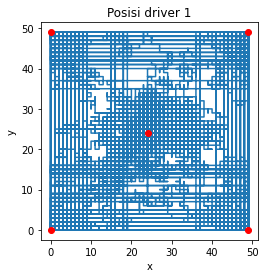

In [11]:
#Coba plot posisi
x_coor = []
y_coor = []
for coor in motorist_pos:
    x_coor.append(coor[0])
    y_coor.append(coor[1])



plt.plot(x_coor,y_coor)
for i in range(model.num_of_stations):
    plt.plot(model.stations[i].pos[0],model.stations[i].pos[1],color = "red", marker = 'o')
plt.xlim([0,map_width])
plt.ylim([0,map_height])
plt.title('Posisi driver ' + str(driver_num))
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')

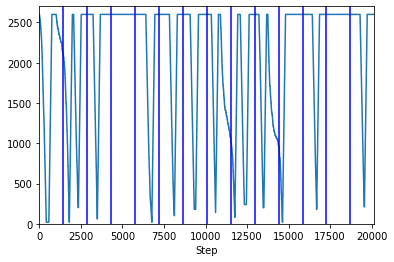

In [15]:
#Cek baterai
battery_id = 5
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()
plt.xlim(0,num_of_step)
plt.ylim(0,2700)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'b', label = 'axvline - full height')



In [17]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive
20155,31
20156,31
20157,31
20158,31
20159,31


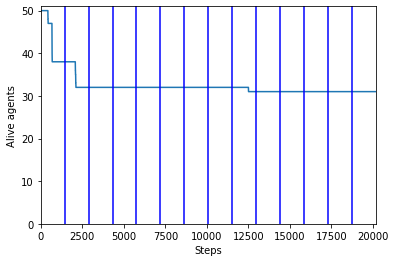

In [18]:
plt.plot(model_data)
plt.ylim([0,51])
plt.ylabel("Alive agents")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'b', label = 'axvline - full height')

In [19]:
a = [1,2,3]
b = a
b.remove(3)
print(a)

[1, 2]


In [20]:
print(agent_data.columns.tolist())

['Position', 'Charge', 'Alive', 'Full_battery', 'Empty_battery', 'CP_full', 'CP_empty']


In [21]:


#dapetin semua motor
motorist_id = []
for mot in model.motorists:
    motorist_id.append(mot.unique_id)

#ID motor pertama dan terakhir
first_motor = min(motorist_id)
last_motor = max(motorist_id)

#Ambil data motor doang
motorist_data = agent_data.loc[(agent_data.index.get_level_values('AgentID')>=first_motor) & (agent_data.index.get_level_values('AgentID') <=last_motor)]


motorist_alive_position = motorist_data.loc[motorist_data['Alive'] == True]["Position"]
motorist_alive_position.tail()

#print jumlah baris
print(len(motorist_alive_position.index))

657373


In [22]:
array_alive_positions = motorist_alive_position.tolist()
print(len(array_alive_positions))

657373


Text(33.0, 0.5, 'y')

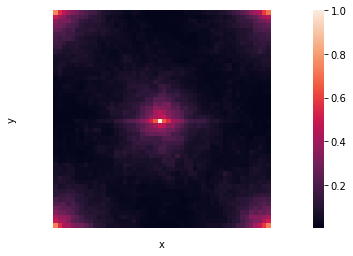

In [23]:
heatmap_data = np.zeros((model.grid.width, model.grid.height))
for coor in array_alive_positions:
    x,y = coor
    heatmap_data[x,y] +=1

most_frequent = np.amax(heatmap_data)
norm_heatmap_data = heatmap_data/most_frequent

ax = sns.heatmap(norm_heatmap_data)
ax.invert_yaxis()
plt.axis('equal')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.tick_params(left = False, bottom = False)
ax.set_xlabel('x')
ax.set_ylabel('y')



    